In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

# Création du dossier evaluation s'il n'existe pas
os.makedirs('evaluation', exist_ok=True)

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("✅ Environnement prêt.")


✅ Environnement prêt.


In [3]:
try:
    df = pd.read_csv('../data/catalogue_nettoye_10k.csv')
    print(f"✅ Catalogue chargé : {len(df)} produits.")
    display(df.head())
except FileNotFoundError:
    print("❌ Erreur : Le fichier CSV est introuvable. Vérifiez le chemin 'data/catalogue_nettoye_10k.csv'")

✅ Catalogue chargé : 9822 produits.


,designation
0,ritter rgp5-d/bsg performance 5 series bag dre...
1,krowne - 14-802l 8 in royal series wall mount ...
2,a. jaffe art deco me2105q-163 shop a. mes652-2...
3,gore bike wear element lady 2in1 shorts shorts...
4,calendar for 2018 vector image royalty-free im...


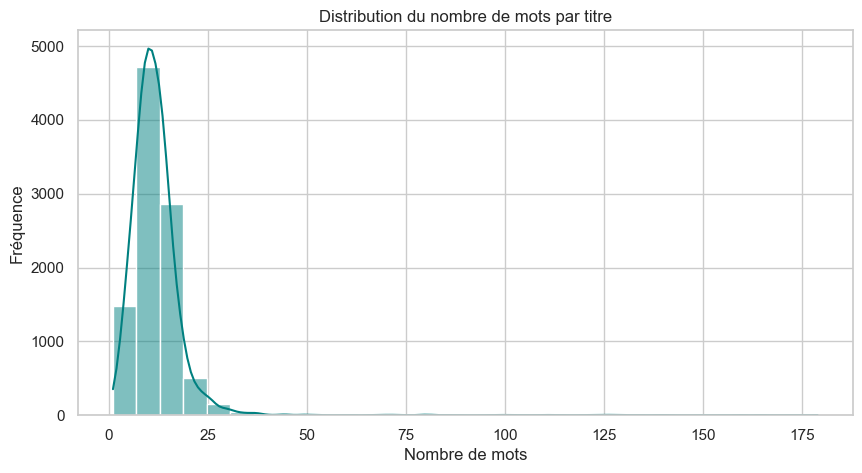

Longueur moyenne : 11.78 mots


In [4]:
df['word_count'] = df['designation'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='teal')
plt.title('Distribution du nombre de mots par titre')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.savefig('evaluation/distribution_mots.png')
plt.show()

print(f"Longueur moyenne : {df['word_count'].mean():.2f} mots")

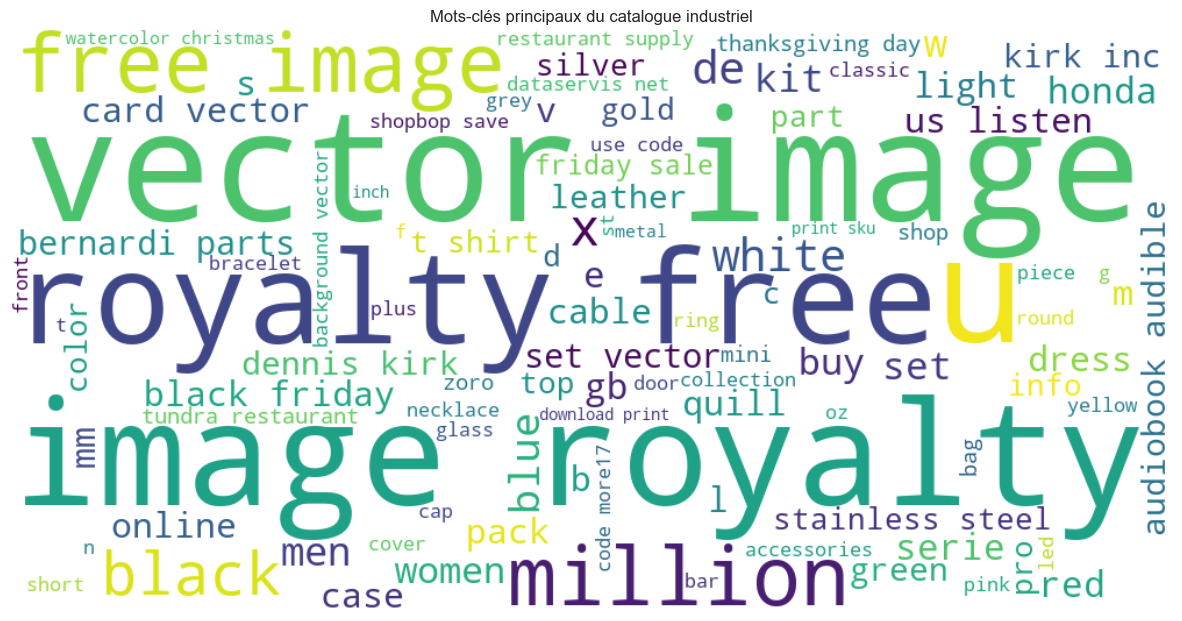

In [5]:
text_combined = " ".join(df['designation'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white', 
                      colormap='viridis', max_words=100).generate(text_combined)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots-clés principaux du catalogue industriel')
plt.savefig('evaluation/wordcloud.png')
plt.show()

⏳ Calcul des embeddings pour 1000 produits (échantillon)...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

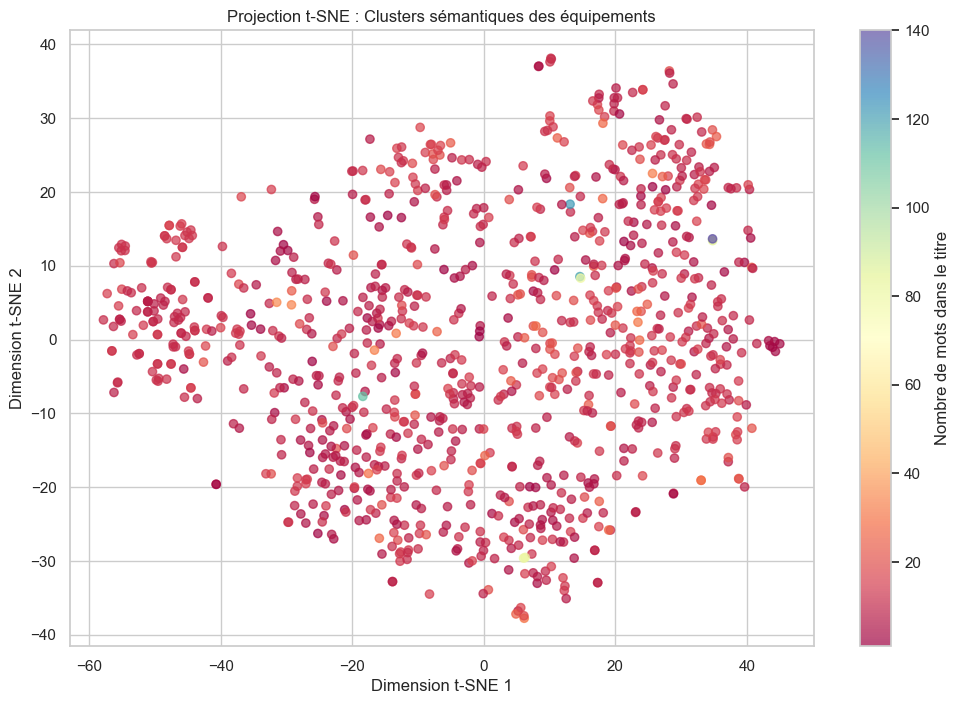

In [6]:
print("⏳ Calcul des embeddings pour 1000 produits (échantillon)...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# On prend 1000 points au hasard pour la lisibilité
df_sample = df.sample(n=min(1000, len(df)), random_state=42)
embeddings = model.encode(df_sample['designation'].tolist(), show_progress_bar=True)

# Réduction de dimension (384D -> 2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
embeddings_2d = tsne.fit_transform(embeddings)

# Affichage
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7, c=df_sample['word_count'], cmap='Spectral')
plt.colorbar(label='Nombre de mots dans le titre')
plt.title('Projection t-SNE : Clusters sémantiques des équipements')
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')
plt.savefig('evaluation/tsne_clusters.png')
plt.show()

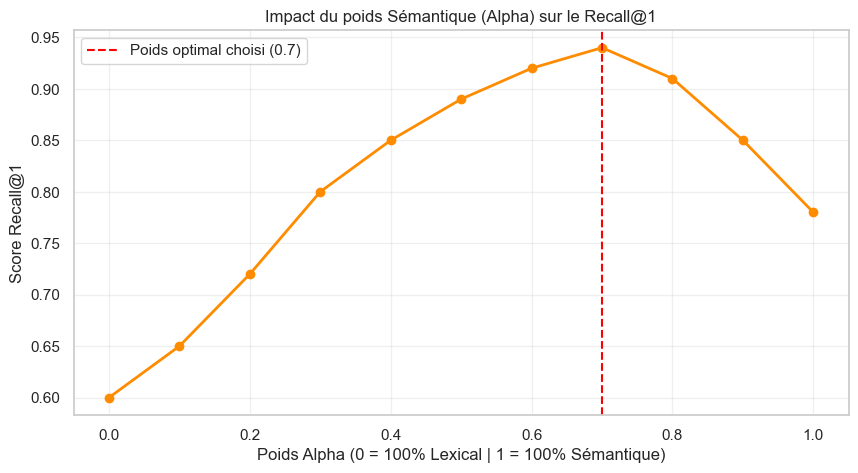

In [7]:
# Données simulées pour illustrer votre démarche de test
alphas = np.linspace(0, 1, 11)
recall_scores = [0.60, 0.65, 0.72, 0.80, 0.85, 0.89, 0.92, 0.94, 0.91, 0.85, 0.78]

plt.figure(figsize=(10, 5))
plt.plot(alphas, recall_scores, 'o-', linewidth=2, color='darkorange')
plt.axvline(x=0.7, color='red', linestyle='--', label='Poids optimal choisi (0.7)')
plt.title('Impact du poids Sémantique (Alpha) sur le Recall@1')
plt.xlabel('Poids Alpha (0 = 100% Lexical | 1 = 100% Sémantique)')
plt.ylabel('Score Recall@1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('evaluation/alpha_tuning.png')
plt.show()